## Factor Analyses

In [1]:
suppressWarnings(suppressMessages(library(tidyverse)))
suppressWarnings(suppressMessages(library(psych)))
library(GPArotation)
suppressWarnings(suppressMessages(library(ltm)))

# Load the data
load(file = "~/Documents/holding_gwu_dissertation/data/study2_data.RData")
paste0("Initial sample: ", nrow(vcf_data))

[1] "Initial sample: 371"

### COVID-19 Trust Views

In [2]:
temp <- vcf_data %>% dplyr::select(cdc_trust, fda_trust, 
                                   fed_gov_trust, local_gov_trust) 
temp <- temp[complete.cases(temp), ]    

cronbach.alpha(temp)


Cronbach's alpha for the 'temp' data-set

Items: 4
Sample units: 371
alpha: 0.88


,cdc_trust,fda_trust,fed_gov_trust,local_gov_trust
cdc_trust,1.0000000,0.7764639,0.6293614,0.5646663
fda_trust,0.7764639,1.0000000,0.5733233,0.5564150
fed_gov_trust,0.6293614,0.5733233,1.0000000,0.8225339
local_gov_trust,0.5646663,0.5564150,0.8225339,1.0000000


Parallel analysis suggests that the number of factors =  2  and the number of components =  NA 


Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = corr_mat)
Overall MSA =  0.72
MSA for each item = 
      cdc_trust       fda_trust   fed_gov_trust local_gov_trust 
           0.73            0.74            0.71            0.71 

$chisq
[1] 964.0806

$p.value
[1] 5.241971e-205

$df
[1] 6

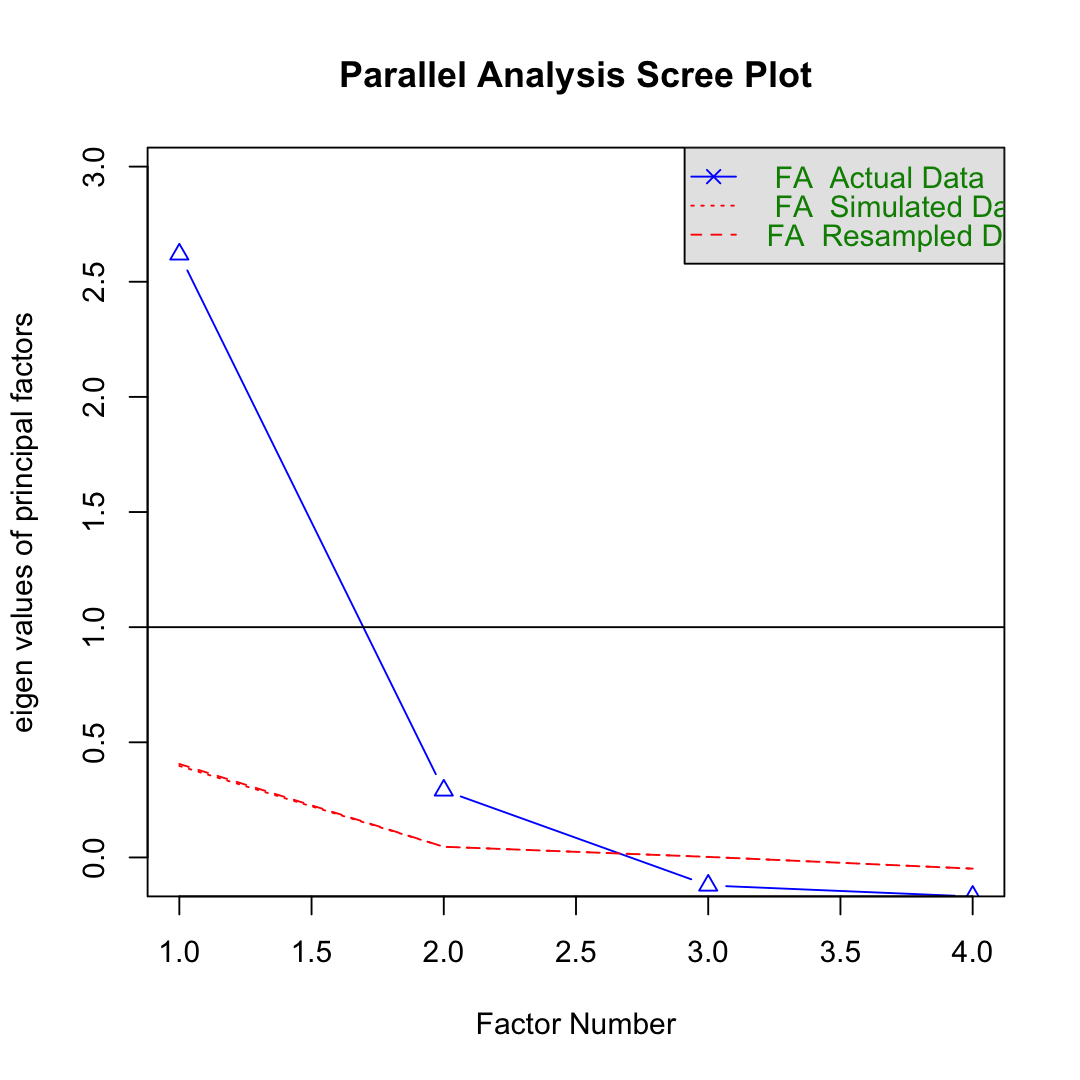

In [3]:
corr_mat <- cor(temp, use = 'pairwise.complete.obs')
corr_mat

options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 180)
psych::fa.parallel(temp, fm="pa", fa="fa",  main = "Parallel Analysis Scree Plot", n.iter=500)

KMO(corr_mat)
cortest.bartlett(corr_mat, nrow(temp))

Factor Analysis using method =  ml
Call: psych::fa(r = temp, nfactors = 2, rotate = "varimax", fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
                item  ML1  ML2   h2     u2 com
cdc_trust          1 0.95 0.30 0.99 0.0051 1.2
fda_trust          2 0.70 0.37 0.63 0.3736 1.5
local_gov_trust    3 0.30 0.94 0.98 0.0239 1.2
fed_gov_trust      4 0.43 0.74 0.73 0.2716 1.6

                       ML1  ML2
SS loadings           1.67 1.66
Proportion Var        0.42 0.41
Cumulative Var        0.42 0.83
Proportion Explained  0.50 0.50
Cumulative Proportion 0.50 1.00

Mean item complexity =  1.4
Test of the hypothesis that 2 factors are sufficient.

The degrees of freedom for the null model are  6  and the objective function was  2.62 with Chi Square of  964.08
The degrees of freedom for the model are -1  and the objective function was  0 

The root mean square of the residuals (RMSR) is  0 
The df corrected root mean square of the residuals is  NA 

The ha

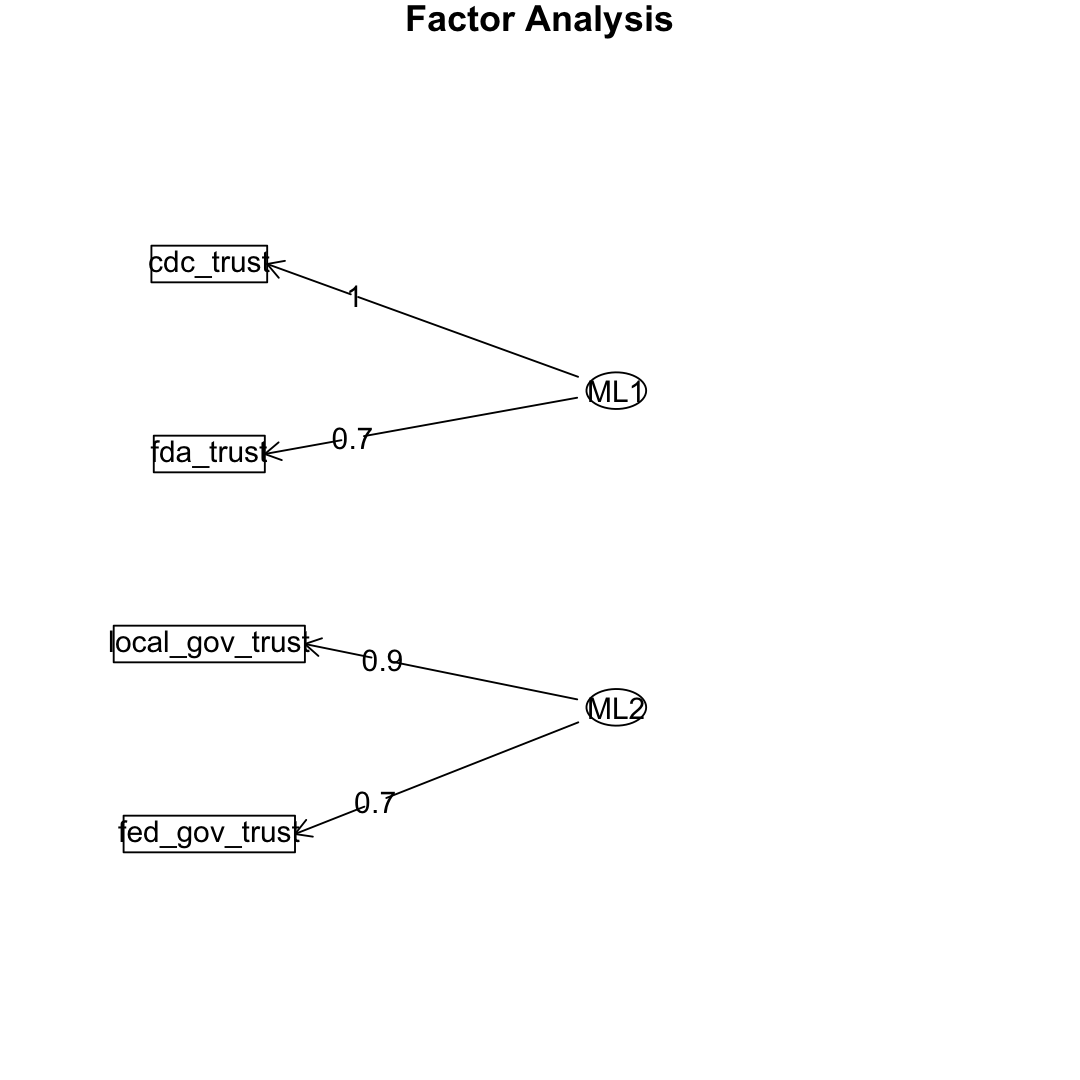

In [4]:
fit <- psych::fa(temp, fm = "ml", rotate = "varimax", nfactors = 2) %>% fa.sort()
print(fit, sort = TRUE)
fa.diagram(fit)

### Vaccine Beliefs

In [5]:
temp <- vcf_data %>% 
    dplyr::select(base_sp_efficacy, base_sp_safety, base_sp_importance, base_sp_necessity) %>%
    mutate(base_sp_efficacy = base_sp_efficacy %>% as.numeric(),
           base_sp_safety = base_sp_safety %>% as.numeric(),
           base_sp_importance = base_sp_importance %>% as.numeric(),
           base_sp_necessity = base_sp_necessity %>% as.numeric())
temp <- temp[complete.cases(temp), ]    

cronbach.alpha(temp)


Cronbach's alpha for the 'temp' data-set

Items: 4
Sample units: 371
alpha: 0.91


In [6]:
temp <- vcf_data %>% 
    dplyr::select(sp_efficacy_6, sp_safety_6, sp_importance_6, sp_necessity_6) %>%
    mutate(sp_efficacy_6 = sp_efficacy_6 %>% as.numeric(),
           sp_safety_6 = sp_safety_6 %>% as.numeric(),
           sp_importance_6 = sp_importance_6 %>% as.numeric(),
           sp_necessity_6 = sp_necessity_6 %>% as.numeric())
temp <- temp[complete.cases(temp), ]    

cronbach.alpha(temp)


Cronbach's alpha for the 'temp' data-set

Items: 4
Sample units: 371
alpha: 0.932


,sp_efficacy_6,sp_safety_6,sp_importance_6,sp_necessity_6
sp_efficacy_6,1.0000000,0.7958280,0.7729624,0.7550184
sp_safety_6,0.7958280,1.0000000,0.7296233,0.7122305
sp_importance_6,0.7729624,0.7296233,1.0000000,0.8700460
sp_necessity_6,0.7550184,0.7122305,0.8700460,1.0000000


Parallel analysis suggests that the number of factors =  2  and the number of components =  NA 


Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = corr_mat)
Overall MSA =  0.82
MSA for each item = 
  sp_efficacy_6     sp_safety_6 sp_importance_6  sp_necessity_6 
           0.84            0.85            0.79            0.79 

$chisq
[1] 1289.236

$p.value
[1] 2.316778e-275

$df
[1] 6

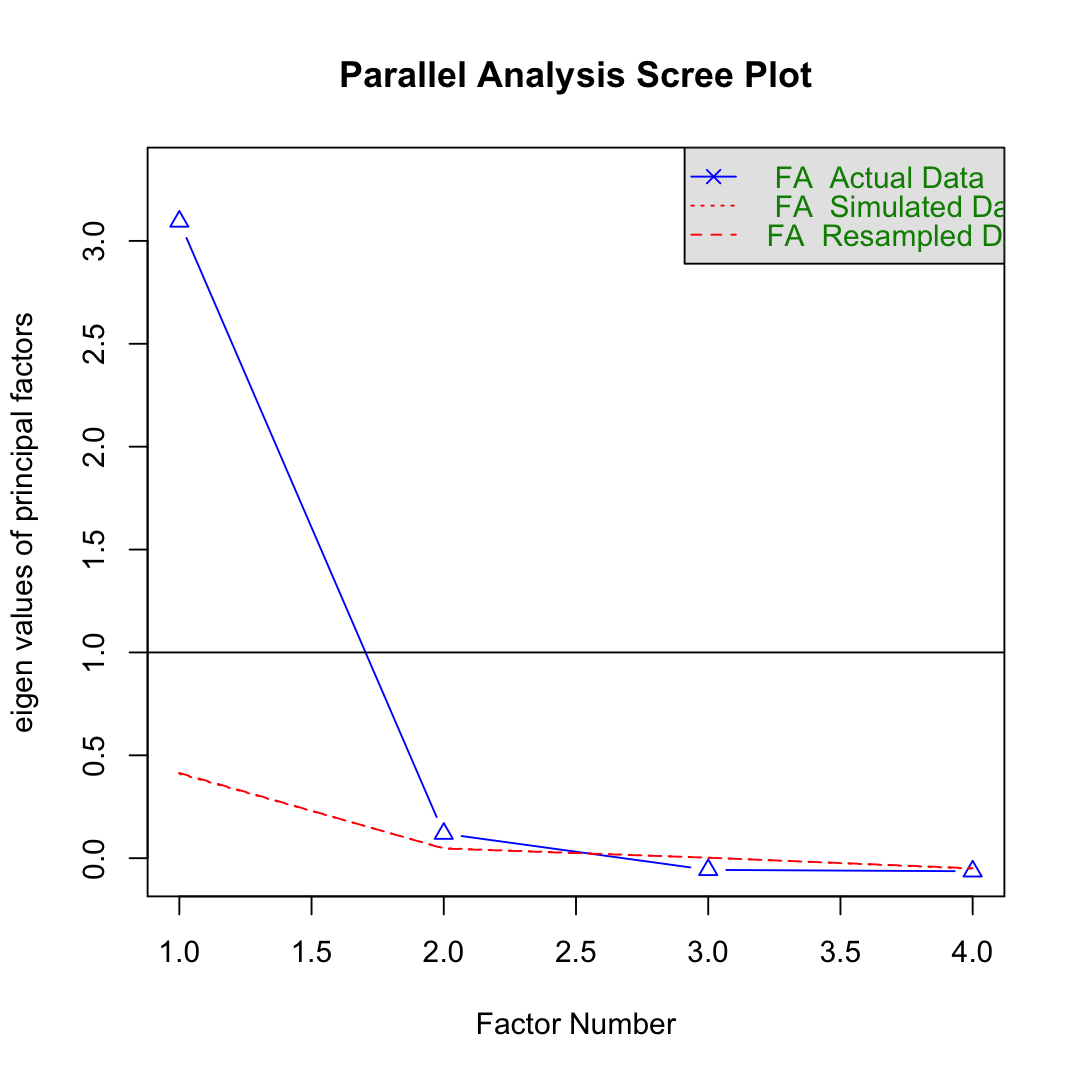

In [7]:
corr_mat <- cor(temp, use = 'pairwise.complete.obs')
corr_mat

options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 180)
psych::fa.parallel(temp, fm="pa", fa="fa",  main = "Parallel Analysis Scree Plot", n.iter=500)

KMO(corr_mat)
cortest.bartlett(corr_mat, nrow(temp))

Factor Analysis using method =  ml
Call: psych::fa(r = temp, nfactors = 2, rotate = "varimax", fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
                item  ML1  ML2   h2   u2 com
sp_importance_6    1 0.82 0.46 0.89 0.11 1.6
sp_necessity_6     2 0.81 0.44 0.85 0.15 1.5
sp_efficacy_6      3 0.53 0.74 0.82 0.18 1.8
sp_safety_6        4 0.48 0.74 0.77 0.23 1.7

                       ML1  ML2
SS loadings           1.85 1.49
Proportion Var        0.46 0.37
Cumulative Var        0.46 0.83
Proportion Explained  0.55 0.45
Cumulative Proportion 0.55 1.00

Mean item complexity =  1.7
Test of the hypothesis that 2 factors are sufficient.

The degrees of freedom for the null model are  6  and the objective function was  3.5 with Chi Square of  1289.24
The degrees of freedom for the model are -1  and the objective function was  0 

The root mean square of the residuals (RMSR) is  0 
The df corrected root mean square of the residuals is  NA 

The harmonic num

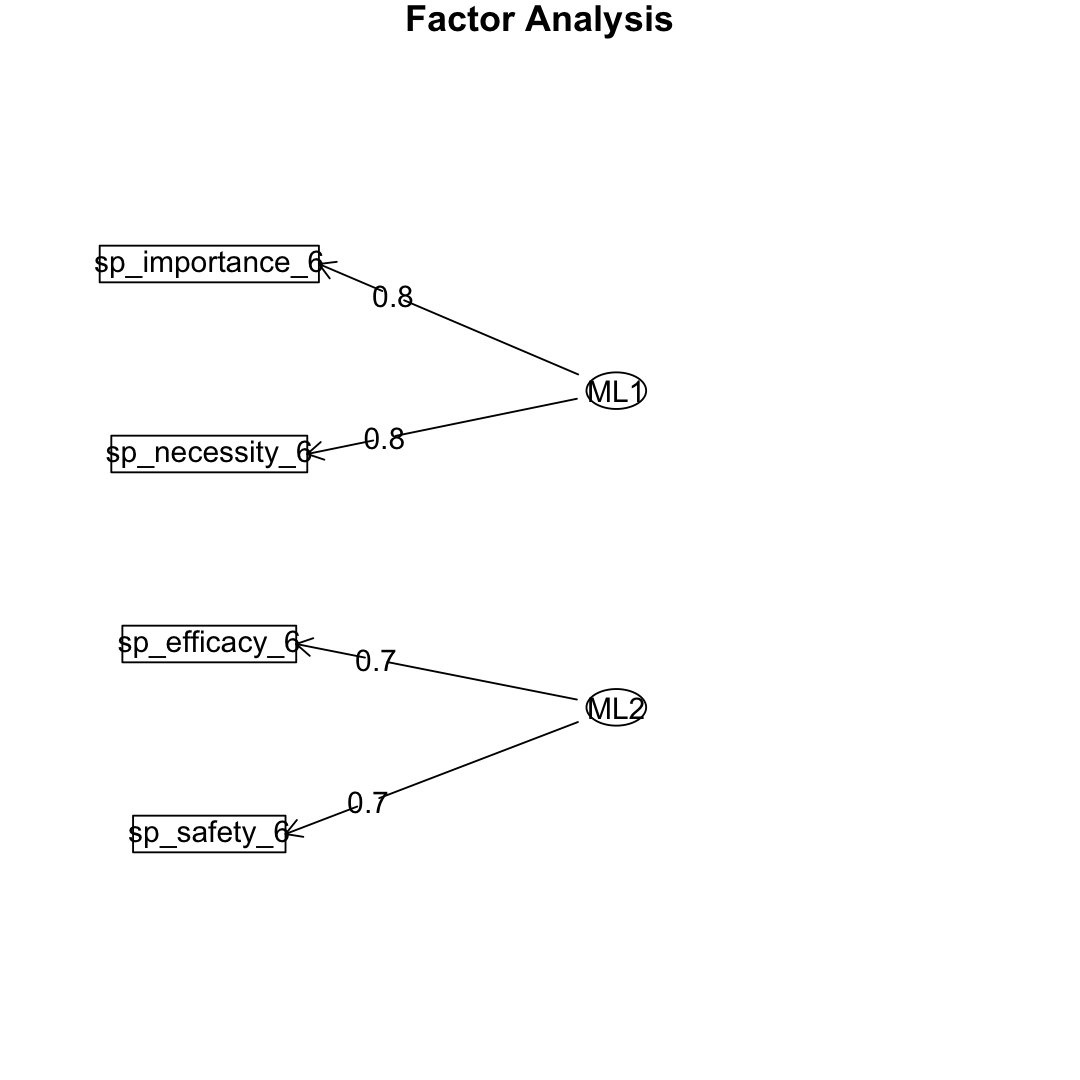

In [8]:
fit <- psych::fa(temp, fm = "ml", rotate = "varimax", nfactors = 2) %>% fa.sort()
print(fit, sort = TRUE)
fa.diagram(fit)